In [14]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('/Users/emilneacsu/Desktop/sqlsuperbet/lego.db')
cursor = conn.cursor()

In [15]:
# Check themes table
cursor.execute('SELECT * FROM themes LIMIT 5;')
themes = cursor.fetchall()
print("Themes:", themes)

# Check colors table
cursor.execute('SELECT * FROM colors LIMIT 5;')
colors = cursor.fetchall()
print("Colors:", colors)



Themes: [(1, 'Technic', None), (3, 'Competition', 1), (4, 'Expert Builder', 1), (16, 'RoboRiders', 1), (17, 'Speed Slammers', 1)]
Colors: [(-1, '[Unknown]', '0033B2', 'f'), (0, 'Black', '05131D', 'f'), (1, 'Blue', '0055BF', 'f'), (2, 'Green', '237841', 'f'), (3, 'Dark Turquoise', '008F9B', 'f')]


In [16]:
#We have a comprehensive list of sets over the years and the number of
#parts that each of these sets contained. What is the trend in the number
#of parts by years?

In [ ]:
import pandas as pd 
    #Fetch the number of parts per set per year
query = '''
SELECT year, SUM(num_parts) as total_parts
FROM sets
GROUP BY year
ORDER BY year;
'''
data = pd.read_sql_query(query, conn)
# Close the connection
conn.close()

In [17]:
print(data.head())


   year  total_parts
0  1949          498
1  1950            6
2  1953           50
3  1954          117
4  1955          476


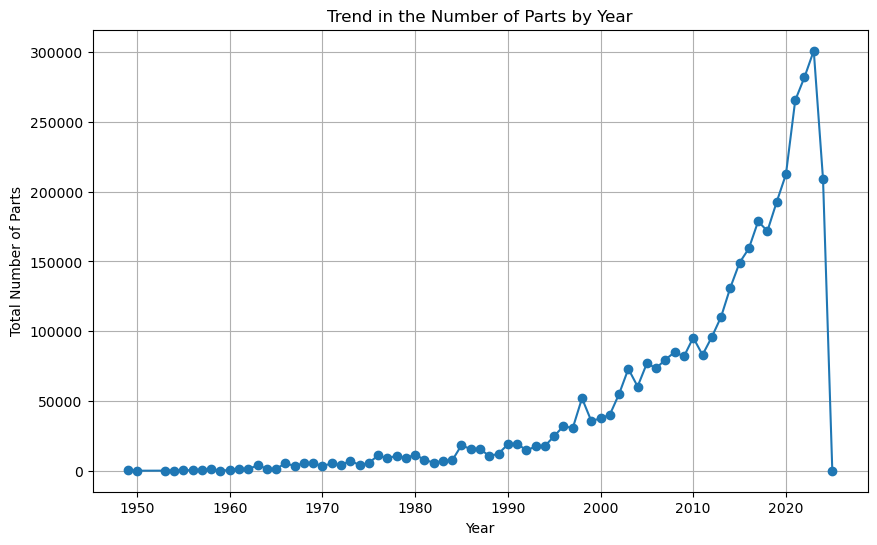

In [18]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['total_parts'], marker='o')
plt.title('Trend in the Number of Parts by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Parts')
plt.grid(True)
plt.show()


In [ ]:
#We can see that in every year the number of parts is increasing.

In [ ]:
#Lego blocks ship under multiple themes. Let us try to get a sense of how
#the number of themes shipped has varied over the years. Get the number
#of unique themes released in 1999.

In [20]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('/Users/emilneacsu/Desktop/sqlsuperbet/lego.db')
cursor = conn.cursor()



# Query to get the number of unique themes released in 1999
query = '''
SELECT COUNT(DISTINCT themes.id) as unique_themes_1999
FROM sets
JOIN themes ON sets.theme_id = themes.id
WHERE sets.year = 1999;
'''

# Execute the query and fetch the result
cursor.execute(query)
result = cursor.fetchone()
unique_themes_1999 = result[0] if result else 0

# Close the connection
conn.close()

# Print the result
print(f"Number of unique themes released in 1999: {unique_themes_1999}")


Number of unique themes released in 1999: 57


In [ ]:
#How many distinct colors are available? What can you tell us about how
#the color scheme changed over the years? Is there any theme with a single-
#color scheme?

In [29]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('/Users/emilneacsu/Desktop/sqlsuperbet/lego.db')
cursor = conn.cursor()

# Query to get the number of distinct colors
query_distinct_colors = '''
SELECT COUNT(DISTINCT id) as distinct_colors
FROM colors;
'''

# Execute the query and fetch the result
cursor.execute(query_distinct_colors)
result = cursor.fetchone()
distinct_colors = result[0] if result else 0

# Print the result
print(f"Number of distinct colors available: {distinct_colors} \n")

# Query to get the number of colors used each year
query_color_scheme = '''
SELECT s.year, COUNT(DISTINCT ip.color_id) as distinct_colors
FROM sets s
JOIN inventories i ON s.set_num = i.set_num
JOIN inventory_parts ip ON i.id = ip.inventory_id
GROUP BY s.year
ORDER BY s.year;
'''

# Execute the query and fetch the result
color_scheme_data = pd.read_sql_query(query_color_scheme, conn)
print("Distinct colors by year:")
# Print the result
print(color_scheme_data)

# Query to find themes with a single-color scheme
query_single_color_theme = '''
SELECT t.name as theme_name, COUNT(DISTINCT ip.color_id) as distinct_colors
FROM themes t
JOIN sets s ON t.id = s.theme_id
JOIN inventories i ON s.set_num = i.set_num
JOIN inventory_parts ip ON i.id = ip.inventory_id
GROUP BY t.name
HAVING COUNT(DISTINCT ip.color_id) = 1;
'''

# Execute the query and fetch the result
single_color_themes = pd.read_sql_query(query_single_color_theme, conn)

# Print the result
print("Single colors theme:")
print(single_color_themes)

# Close the connection
conn.close()


Number of distinct colors available: 161868 

Distinct colors by year:
    year  distinct_colors
0   1949               10
1   1950                3
2   1953                5
3   1954                7
4   1955                7
..   ...              ...
69  2020               74
70  2021               72
71  2022               75
72  2023               77
73  2024               77

[74 rows x 2 columns]
Single colors theme:
        theme_name  distinct_colors
0  DFB Minifigures                1
1      Value Packs                1


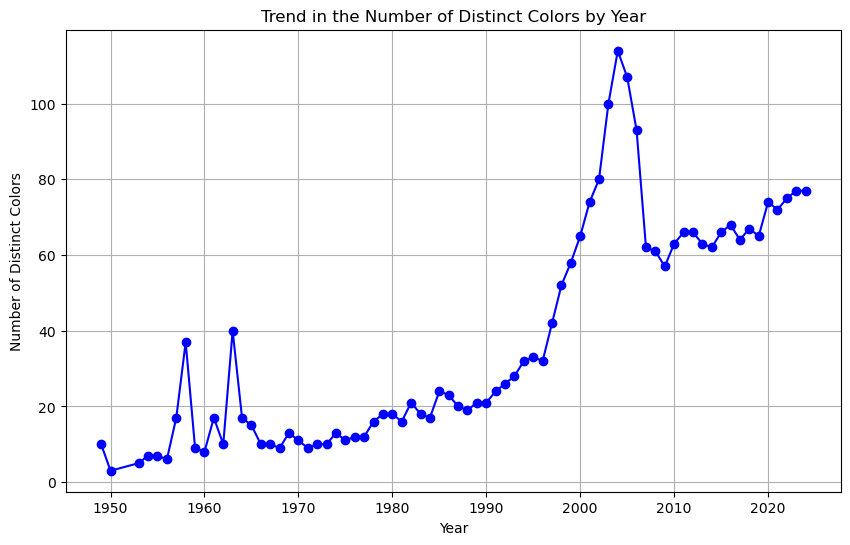

In [24]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(color_scheme_data['year'], color_scheme_data['distinct_colors'], marker='o', linestyle='-', color='b')
plt.title('Trend in the Number of Distinct Colors by Year')
plt.xlabel('Year')
plt.ylabel('Number of Distinct Colors')
plt.grid(True)
plt.show()

In [ ]:
#We can clearly see that the color scheme increased over the ears and the maximum was in 2009,
#than it decreased from over 100 to 60 and from 2010 it continues to grow.

In [ ]:
#Combining inventory data with trends and growth data at set themes and
#yearly level from BrickEconomy , the product manager would love your
#recommendation on how to be sure the next big idea is successful and
#why.

In [31]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('/Users/emilneacsu/Desktop/sqlsuperbet/lego.db')

# Query to find the most popular themes
theme_query = '''
    SELECT themes.name AS theme_name, COUNT(sets.set_num) AS set_count
    FROM sets
    JOIN themes ON sets.theme_id = themes.id
    GROUP BY themes.name
    ORDER BY set_count DESC
    LIMIT 10;  -- Limit to top 10 themes for relevance
'''

# Read data into DataFrame
theme_data = pd.read_sql_query(theme_query, conn)

# Display the most popular themes
print(theme_data)

# Close the connection
conn.close()


                       theme_name  set_count
0                       Star Wars        961
1                         Technic        889
2                       Key Chain        729
3                            Gear        693
4                         Friends        616
5                         Ninjago        545
6                        Bionicle        447
7                            Town        422
8                    Classic Town        411
9  Stationery and Office Supplies        402


          color_name theme_name  color_count
0  Light Bluish Gray  Star Wars        57174
1              Black    Technic        48732
2              Black  Star Wars        45762
3   Dark Bluish Gray  Star Wars        43530
4              White    Friends        38487


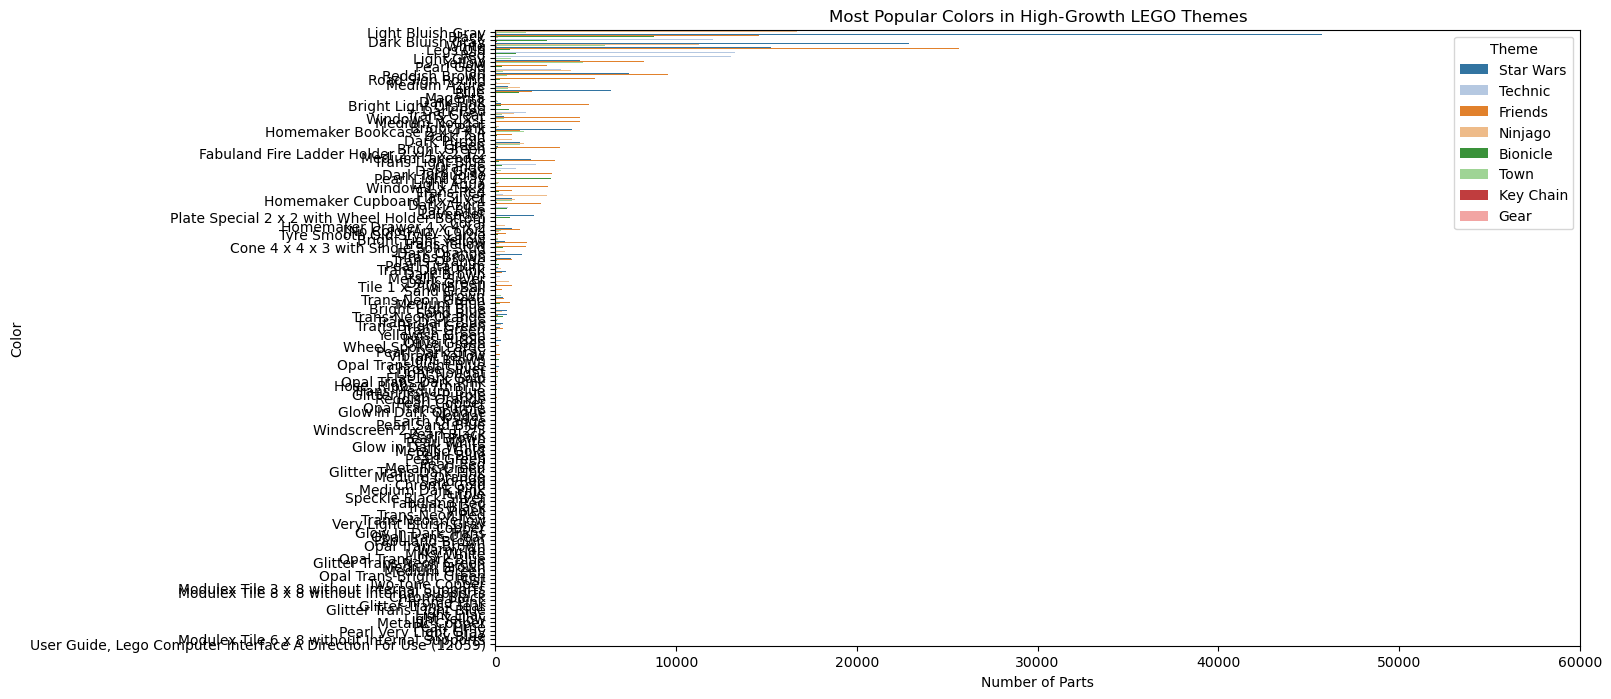

In [32]:
# Reconnect to the database
conn = sqlite3.connect('/Users/emilneacsu/Desktop/sqlsuperbet/lego.db')

# List of top themes identified from previous query
top_themes = ['Ninjago', 'Star Wars', 'Technic', 'Key Chain', 'Gear','Friends','Bionicle','Town','Classic Town ','Stationery and Office Supplies ']  # Example list

# Format the themes for SQL query
theme_list = ', '.join(f"'{theme}'" for theme in top_themes)

# Original query with updated theme filter
query = f'''
    SELECT 
        colors.name AS color_name, 
        themes.name AS theme_name,
        COUNT(inventory_parts.color_id) AS color_count
    FROM sets
    JOIN inventories ON sets.set_num = inventories.set_num
    JOIN inventory_parts ON inventories.id = inventory_parts.inventory_id
    JOIN colors ON inventory_parts.color_id = colors.id
    JOIN themes ON sets.theme_id = themes.id
    WHERE themes.name IN ({theme_list})
    GROUP BY colors.name, themes.name
    ORDER BY color_count DESC;
'''

# Read data into DataFrame
data = pd.read_sql_query(query, conn)
conn.close()

# Display the first few rows of the data
print(data.head())

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='color_count', y='color_name', hue='theme_name', data=data, palette='tab20')
plt.title('Most Popular Colors in High-Growth LEGO Themes')
plt.xlabel('Number of Parts')
plt.ylabel('Color')
plt.legend(title='Theme')
plt.show()


         color_name theme_name  color_count
0             Black   Bionicle         8784
1  Pearl Light Gray   Bionicle         3102
2  Dark Bluish Gray   Bionicle         2868
3             White    Classic         4761
4             Black    Classic         3228


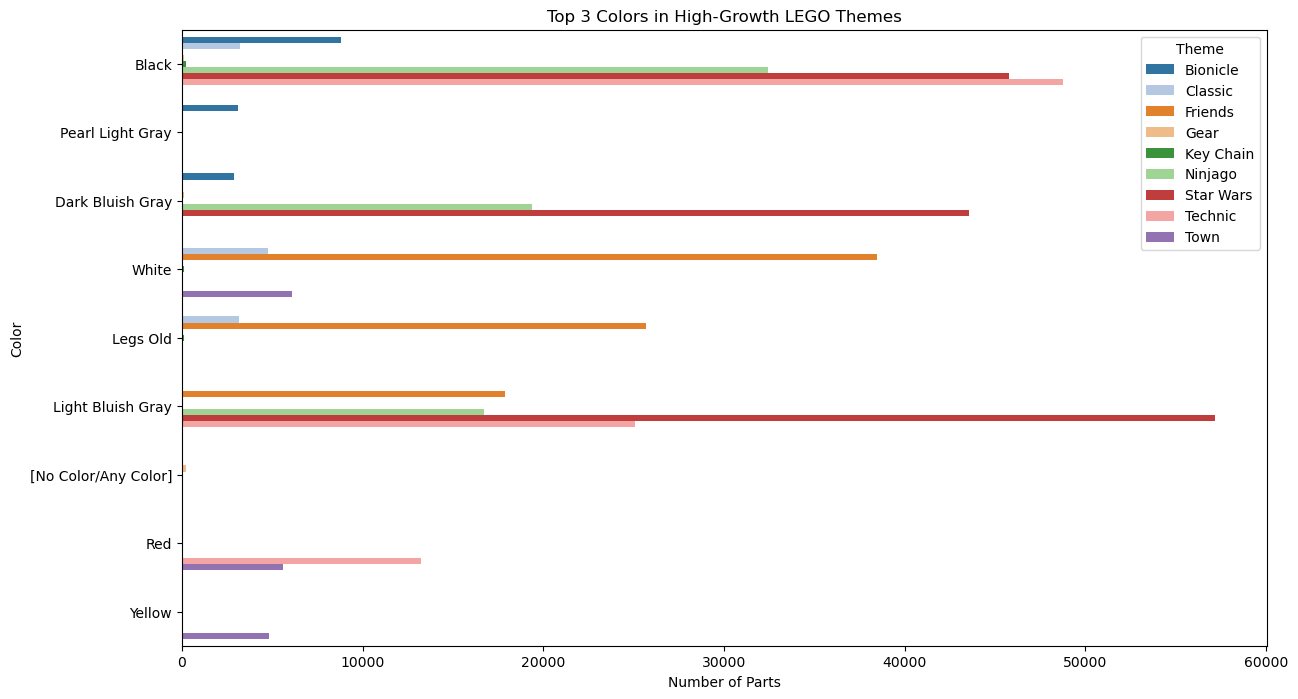

In [33]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('/Users/emilneacsu/Desktop/sqlsuperbet/lego.db')

# List of top themes identified from previous query
top_themes = ['Ninjago', 'Star Wars', 'Technic', 'Key Chain', 'Gear', 'Friends', 'Bionicle', 'Town', 'Classic']

# Format the themes for SQL query
theme_list = ', '.join(f"'{theme}'" for theme in top_themes)

# Modified query with ranking and filtering for top 3 colors per theme
query = f'''
    WITH RankedColors AS (
        SELECT 
            colors.name AS color_name, 
            themes.name AS theme_name,
            COUNT(inventory_parts.color_id) AS color_count,
            ROW_NUMBER() OVER (PARTITION BY themes.name ORDER BY COUNT(inventory_parts.color_id) DESC) AS color_rank
        FROM sets
        JOIN inventories ON sets.set_num = inventories.set_num
        JOIN inventory_parts ON inventories.id = inventory_parts.inventory_id
        JOIN colors ON inventory_parts.color_id = colors.id
        JOIN themes ON sets.theme_id = themes.id
        WHERE themes.name IN ({theme_list})
        GROUP BY colors.name, themes.name
    )
    SELECT color_name, theme_name, color_count
    FROM RankedColors
    WHERE color_rank <= 3
    ORDER BY theme_name, color_count DESC;
'''

# Read data into DataFrame
data = pd.read_sql_query(query, conn)
conn.close()

# Display the first few rows of the data
print(data.head())

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='color_count', y='color_name', hue='theme_name', data=data, palette='tab20')
plt.title('Top 3 Colors in High-Growth LEGO Themes')
plt.xlabel('Number of Parts')
plt.ylabel('Color')
plt.legend(title='Theme')
plt.show()


  color_name      theme_name  color_count
0      White  Brick Sketches          549
1   Legs Old  Brick Sketches          366
2      Black  Brick Sketches          279
3      White         Classic         4761
4      Black         Classic         3228


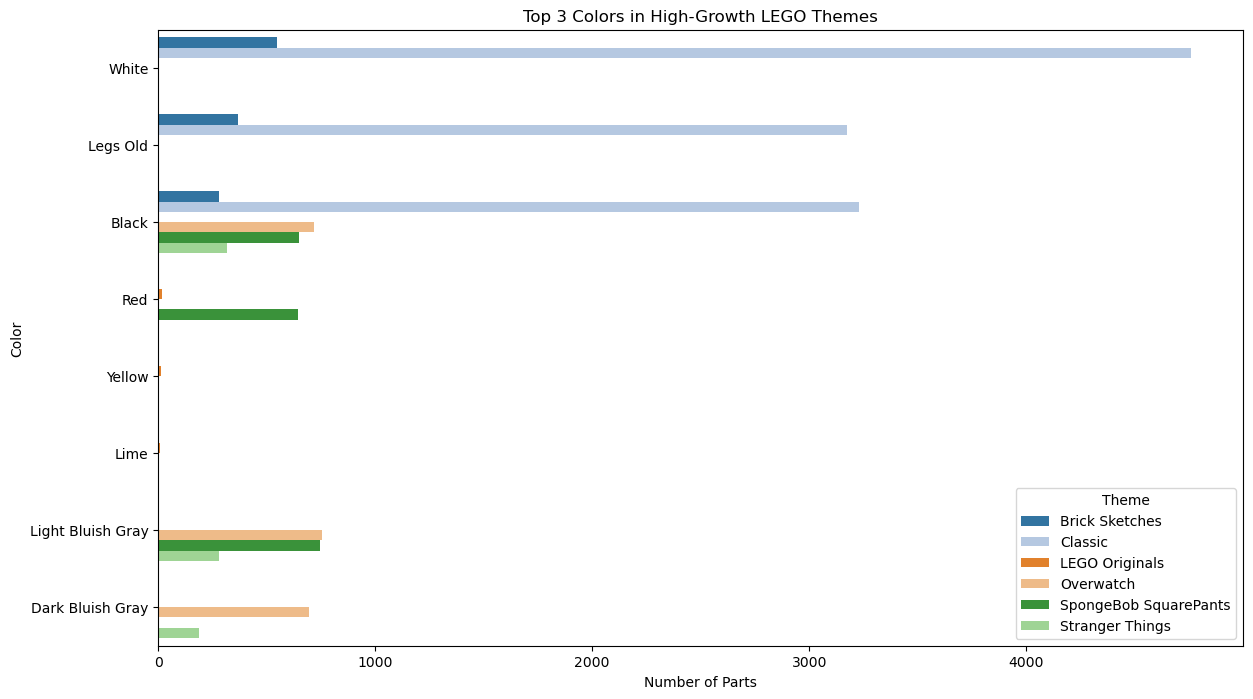

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('/Users/emilneacsu/Desktop/sqlsuperbet/lego.db')

# List of top themes identified from previous query
top_themes = ['Stranger Things', 'FORMA', 'Vidiyo', 'BrickLink', 'Overwatch', 'Brick Sketches', 'SpongeBob SquarePants', 'LEGO Originals', 'Classic']

# Format the themes for SQL query
theme_list = ', '.join(f"'{theme}'" for theme in top_themes)

# Modified query with ranking and filtering for top 3 colors per theme
query = f'''
    WITH RankedColors AS (
        SELECT 
            colors.name AS color_name, 
            themes.name AS theme_name,
            COUNT(inventory_parts.color_id) AS color_count,
            ROW_NUMBER() OVER (PARTITION BY themes.name ORDER BY COUNT(inventory_parts.color_id) DESC) AS color_rank
        FROM sets
        JOIN inventories ON sets.set_num = inventories.set_num
        JOIN inventory_parts ON inventories.id = inventory_parts.inventory_id
        JOIN colors ON inventory_parts.color_id = colors.id
        JOIN themes ON sets.theme_id = themes.id
        WHERE themes.name IN ({theme_list})
        GROUP BY colors.name, themes.name
    )
    SELECT color_name, theme_name, color_count
    FROM RankedColors
    WHERE color_rank <= 3
    ORDER BY theme_name, color_count DESC;
'''

# Read data into DataFrame
data = pd.read_sql_query(query, conn)
conn.close()

# Display the first few rows of the data
print(data.head())

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='color_count', y='color_name', hue='theme_name', data=data, palette='tab20')
plt.title('Top 3 Colors in High-Growth LEGO Themes')
plt.xlabel('Number of Parts')
plt.ylabel('Color')
plt.legend(title='Theme')
plt.show()


                           part_name      theme_name  part_count
0             Tile 1 x 2 with Groove  Brick Sketches          19
1           Tile Round 1 x 1 Quarter  Brick Sketches          19
2             Tile 1 x 1 with Groove  Brick Sketches          14
3                        Brick 1 x 2         Classic         583
4  Plate Round 1 x 1 with Solid Stud         Classic         505


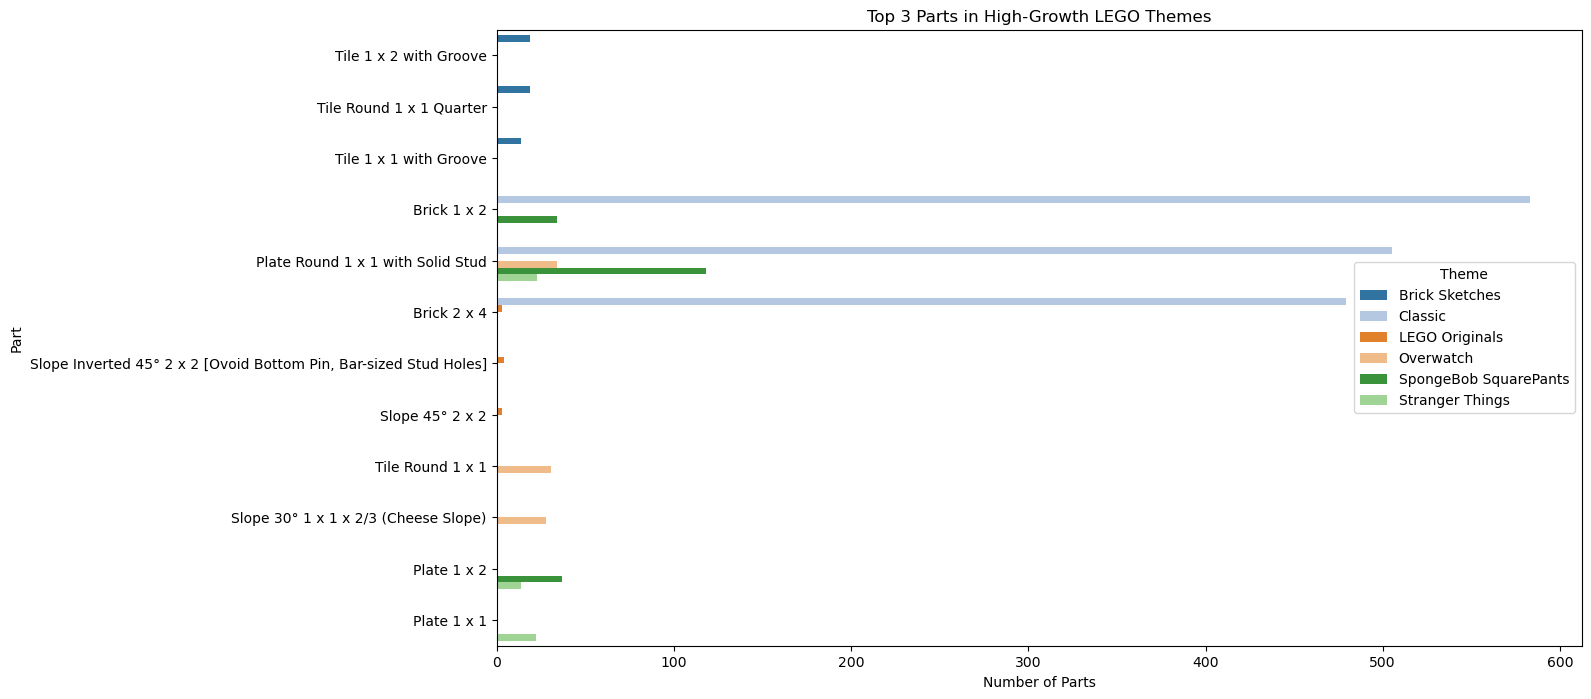

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('/Users/emilneacsu/Desktop/sqlsuperbet/lego.db')

# List of top themes identified from previous query
top_themes = ['Stranger Things', 'FORMA', 'Vidiyo', 'BrickLink', 'Overwatch', 'Brick Sketches', 'SpongeBob SquarePants', 'LEGO Originals', 'Classic']

# Format the themes for SQL query
theme_list = ', '.join(f"'{theme}'" for theme in top_themes)

# Modified query with ranking and filtering for top 3 parts per theme
query = f'''
    WITH RankedParts AS (
        SELECT 
            parts.name AS part_name, 
            themes.name AS theme_name,
            COUNT(inventory_parts.part_num) AS part_count,
            ROW_NUMBER() OVER (PARTITION BY themes.name ORDER BY COUNT(inventory_parts.part_num) DESC) AS part_rank
        FROM sets
        JOIN inventories ON sets.set_num = inventories.set_num
        JOIN inventory_parts ON inventories.id = inventory_parts.inventory_id
        JOIN parts ON inventory_parts.part_num = parts.part_num
        JOIN themes ON sets.theme_id = themes.id
        WHERE themes.name IN ({theme_list})
        GROUP BY parts.name, themes.name
    )
    SELECT part_name, theme_name, part_count
    FROM RankedParts
    WHERE part_rank <= 3
    ORDER BY theme_name, part_count DESC;
'''

# Read data into DataFrame
data = pd.read_sql_query(query, conn)
conn.close()

# Display the first few rows of the data
print(data.head())

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='part_count', y='part_name', hue='theme_name', data=data, palette='tab20')
plt.title('Top 3 Parts in High-Growth LEGO Themes')
plt.xlabel('Number of Parts')
plt.ylabel('Part')
plt.legend(title='Theme')
plt.show()


                                           part_name theme_name  part_count
0  Technic Axle Connector 2 x 3 with Ball Socket,...   Bionicle         302
1  Technic Pin with Friction Ridges Lengthwise an...   Bionicle         283
2                             Technic Axle 2 Notched   Bionicle         282
3                                        Brick 1 x 2    Classic         583
4                  Plate Round 1 x 1 with Solid Stud    Classic         505


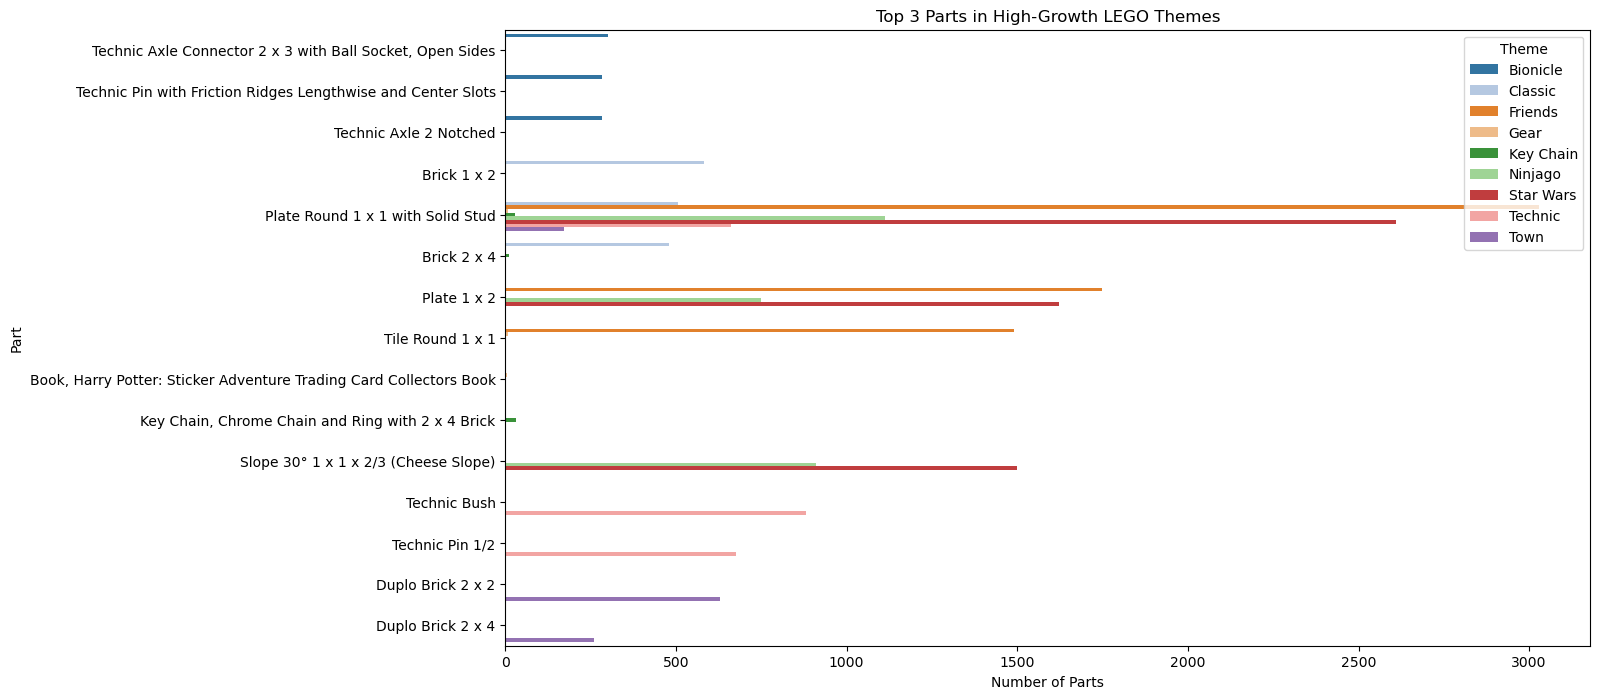

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('/Users/emilneacsu/Desktop/sqlsuperbet/lego.db')

# List of top themes identified from previous query
top_themes = ['Ninjago', 'Star Wars', 'Technic', 'Key Chain', 'Gear', 'Friends', 'Bionicle', 'Town', 'Classic']

# Format the themes for SQL query
theme_list = ', '.join(f"'{theme}'" for theme in top_themes)

# Modified query with ranking and filtering for top 3 parts per theme
query = f'''
    WITH RankedParts AS (
        SELECT 
            parts.name AS part_name, 
            themes.name AS theme_name,
            COUNT(inventory_parts.part_num) AS part_count,
            ROW_NUMBER() OVER (PARTITION BY themes.name ORDER BY COUNT(inventory_parts.part_num) DESC) AS part_rank
        FROM sets
        JOIN inventories ON sets.set_num = inventories.set_num
        JOIN inventory_parts ON inventories.id = inventory_parts.inventory_id
        JOIN parts ON inventory_parts.part_num = parts.part_num
        JOIN themes ON sets.theme_id = themes.id
        WHERE themes.name IN ({theme_list})
        GROUP BY parts.name, themes.name
    )
    SELECT part_name, theme_name, part_count
    FROM RankedParts
    WHERE part_rank <= 3
    ORDER BY theme_name, part_count DESC;
'''

# Read data into DataFrame
data = pd.read_sql_query(query, conn)
conn.close()

# Display the first few rows of the data
print(data.head())

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='part_count', y='part_name', hue='theme_name', data=data, palette='tab20')
plt.title('Top 3 Parts in High-Growth LEGO Themes')
plt.xlabel('Number of Parts')
plt.ylabel('Part')
plt.legend(title='Theme')
plt.show()


          color_name theme_name  color_count
0              Black    Ninjago        32454
1   Dark Bluish Gray    Ninjago        19389
2  Light Bluish Gray    Ninjago        16704
3              White    Ninjago        11277
4         Pearl Gold    Ninjago        11223


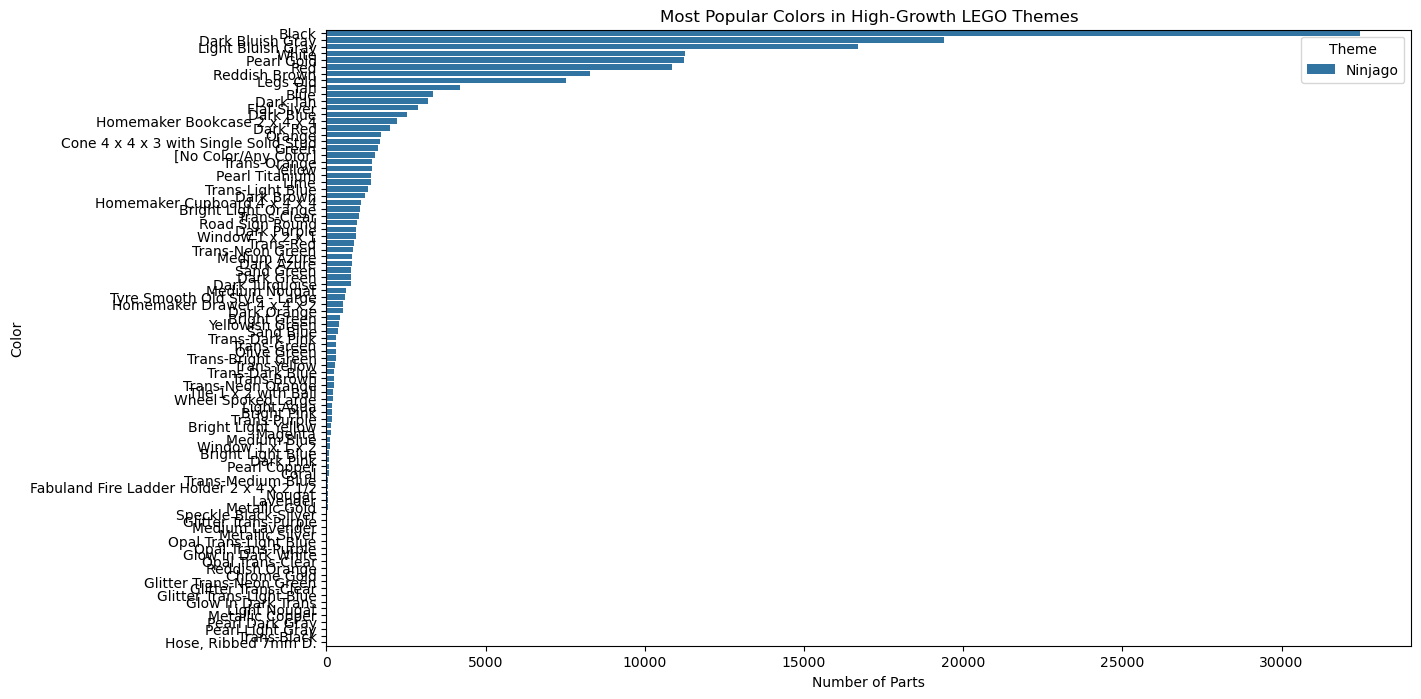

In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('/Users/emilneacsu/Desktop/sqlsuperbet/lego.db')
query = '''
    SELECT 
        colors.name AS color_name, 
        themes.name AS theme_name,
        COUNT(inventory_parts.color_id) AS color_count
    FROM sets
    JOIN inventories ON sets.set_num = inventories.set_num
    JOIN inventory_parts ON inventories.id = inventory_parts.inventory_id
    JOIN colors ON inventory_parts.color_id = colors.id
    JOIN themes ON sets.theme_id = themes.id
    WHERE themes.name IN ( 'Ninjago')
    GROUP BY colors.name, themes.name
    ORDER BY color_count DESC;
'''

# Read data into DataFrame
data = pd.read_sql_query(query, conn)
conn.close()

# Display the first few rows of the data
print(data.head())

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='color_count', y='color_name', hue='theme_name', data=data, palette='tab20')
plt.title('Most Popular Colors in High-Growth LEGO Themes')
plt.xlabel('Number of Parts')
plt.ylabel('Color')
plt.legend(title='Theme')
plt.show()


               color_name  total_usage
0                   Black        25248
1                   White        24465
2                Legs Old        16310
3                     Red        15630
4                  Yellow        14691
..                    ...          ...
207        Fabuland Brown            3
208     Duplo Medium Blue            3
209     Duplo Dark Purple            3
210          Chrome Green            3
211  Chrome Antique Brass            3

[212 rows x 2 columns]


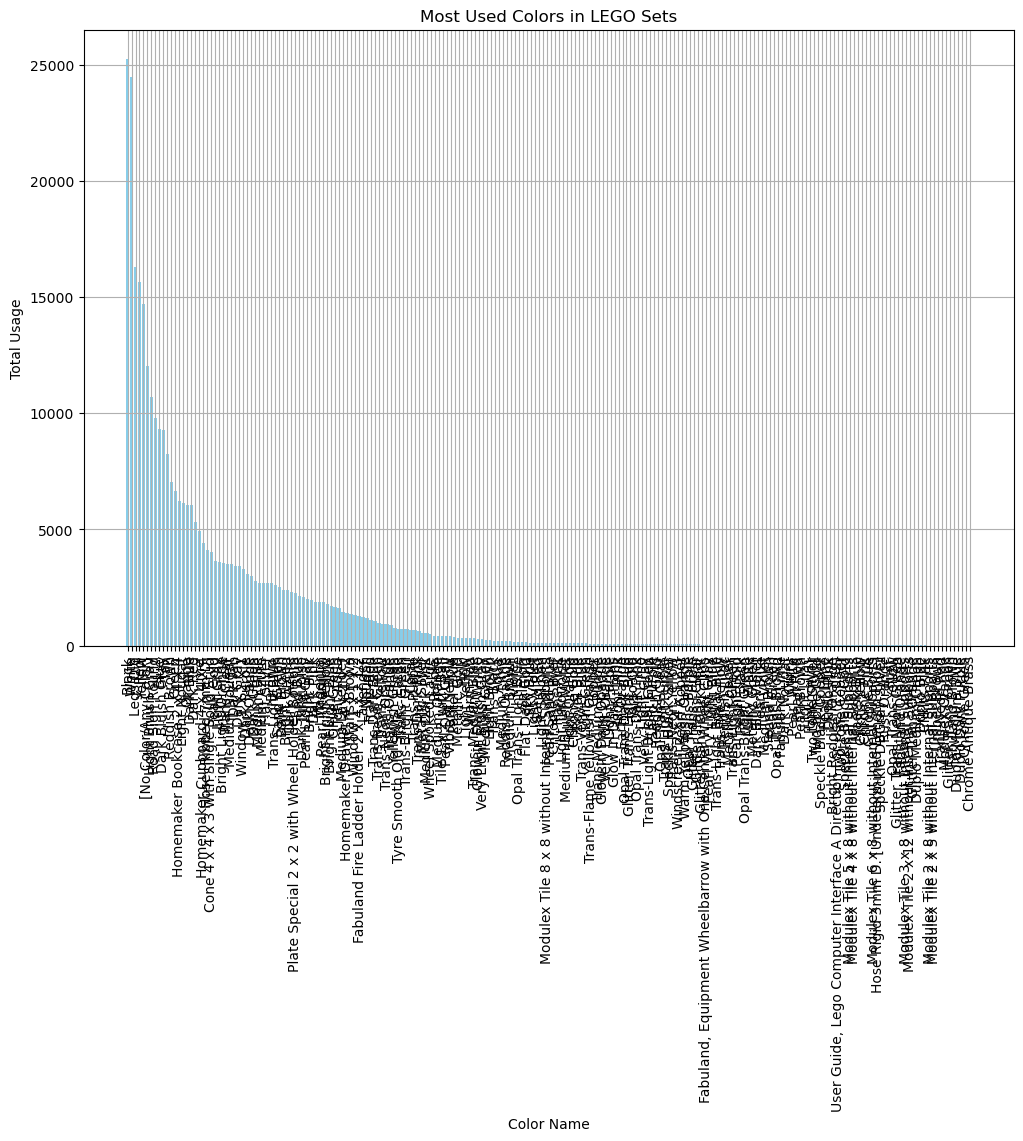

In [1]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('/Users/emilneacsu/Desktop/sqlsuperbet/lego.db')
cursor = conn.cursor()

# Define the query
query = '''
SELECT c.name AS color_name, COUNT(e.color_id) AS total_usage
FROM elements e
JOIN colors c ON e.color_id = c.id
GROUP BY c.name
ORDER BY total_usage DESC;
'''

# Execute the query and load the data into a pandas DataFrame
data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
print(data)

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(data['color_name'], data['total_usage'], color='skyblue')
plt.xlabel('Color Name')
plt.ylabel('Total Usage')
plt.title('Most Used Colors in LEGO Sets')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [6]:
#Conclusion

#1.Focus on High-Growth Themes: Developing new sets within themes that have shown high annual 
#growth rates, such as "Stranger Things', 'FORMA', 'Vidiyo', 'BrickLink', 'Overwatch', 'Brick Sketches', 'SpongeBob SquarePants', 'LEGO Originals', 'Classic'
#can capitalize on existing consumer interest.
#2.For this high growth themes the most used colors are black, white, Legs Old, red and yellow and I also did a graphic to show
#which are the most used parts for this themes(ex:Tile 1 x 2 with Groove,Tile Round 1 x 1 Quarter,Tile 1 x 1 with Groove)
#So, the product manager should focus for this parts and this colors.
#3. We should also consider that the most popular themes are 'Ninjago', 'Star Wars', 'Technic', 'Key Chain', 'Gear', 'Friends', 'Bionicle', 'Town', 'Classic'
#and they still generate money for lego. The most used colors for these themes are Pearl Light Gray,Dark Bluish Gray,White, Black and red
#The parts used for this themes are in generall:Technic Axle Connector 2 x 3 with Ball Socket,Technic Pin with Friction Ridges Lengthwise an,
#brick 1 x 2, etc.
#4. In general for this database of lego the most frequent colors are:Black,White,Legs old, Yellow,Red.